In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv(r"M:\Ayush\ABD\Ducat\Python\CSV files\swiggy_scrap_uncleaned.csv")
df

,hotel_name,rating_and_delivery_time,food_type,location,offer
0,McDonald's,4.5 • 27 mins,"Burgers, Beverages, Cafe, Desserts",Kandivali East,30% OFF UPTO ₹75
1,KFC,4.2 • 30 mins,"Burgers, Biryani, American, Snacks, Fast Food",Kandivali East,40% OFF UPTO ₹80
2,Domino's Pizza,4.3 • 25 mins,"Pizzas, Italian, Pastas, Desserts",Thakur Village,₹150 OFF ABOVE ₹299
3,Charcoal Eats - Biryani & Beyond,4.3 • 24 mins,"Biryani, Kebabs, Hyderabadi, North Indian",Malad Kan East,50% OFF UPTO ₹100
4,Sandwizzaa,4.6 • 22 mins,"Snacks, Fast Food, Beverages, Jain",Kandivali East,60% OFF UPTO ₹120
...,...,...,...,...,...
1744,Allspice,3.8 • 48 mins,"North Indian, Chinese, Biryani, Tandoor",Kandivali west,20% OFF ABOVE ₹700
1745,Poddar Cuisine,4.6 • 52 mins,"Chinese, Biryani, Beverages",Malad Kan West,
1746,JUG's Kitchen,4 • 48 mins,"Indian, Lebanese, Mughlai, Chinese",Goregaon East,₹250 OFF ABOVE ₹999
1747,Choco Magic Patisserie & Confectioners Studio,4.1 • 43 mins,"Desserts, Beverages",Malad West,


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   hotel_name                1749 non-null   object
 1   rating_and_delivery_time  1749 non-null   object
 2   food_type                 1749 non-null   object
 3   location                  1749 non-null   object
 4   offer                     1749 non-null   object
dtypes: object(5)
memory usage: 68.4+ KB


In [25]:
df.isnull().sum()

hotel_name                  0
rating_and_delivery_time    0
food_type                   0
location                    0
offer                       0
dtype: int64

# Cleaning

In [26]:
df[['rating', 'delivery_time']] = df['rating_and_delivery_time'].str.split('•', expand = True)  # expand means two diffrent column

In [27]:
df.head()

,hotel_name,rating_and_delivery_time,food_type,location,offer,rating,delivery_time
0,McDonald's,4.5 • 27 mins,"Burgers, Beverages, Cafe, Desserts",Kandivali East,30% OFF UPTO ₹75,4.5,27 mins
1,KFC,4.2 • 30 mins,"Burgers, Biryani, American, Snacks, Fast Food",Kandivali East,40% OFF UPTO ₹80,4.2,30 mins
2,Domino's Pizza,4.3 • 25 mins,"Pizzas, Italian, Pastas, Desserts",Thakur Village,₹150 OFF ABOVE ₹299,4.3,25 mins
3,Charcoal Eats - Biryani & Beyond,4.3 • 24 mins,"Biryani, Kebabs, Hyderabadi, North Indian",Malad Kan East,50% OFF UPTO ₹100,4.3,24 mins
4,Sandwizzaa,4.6 • 22 mins,"Snacks, Fast Food, Beverages, Jain",Kandivali East,60% OFF UPTO ₹120,4.6,22 mins


In [28]:
df.loc[57]

hotel_name                                                      Dominic Pizza
rating_and_delivery_time                                              33 mins
food_type                   Fast Food, Pizzas, Chinese, Italian, Pastas, D...
location                                                          Pizza Story
offer                                                       50% OFF UPTO ₹100
rating                                                                33 mins
delivery_time                                                            None
Name: 57, dtype: object

In [29]:
df['delivery_time'] = np.where(df['rating'].str.contains('mins'), df['rating'], df['delivery_time'])

In [30]:
df['rating'] = np.where(df['rating'].str.contains('mins'), np.nan, df['rating'])

In [31]:
df.loc[57]

hotel_name                                                      Dominic Pizza
rating_and_delivery_time                                              33 mins
food_type                   Fast Food, Pizzas, Chinese, Italian, Pastas, D...
location                                                          Pizza Story
offer                                                       50% OFF UPTO ₹100
rating                                                                    NaN
delivery_time                                                         33 mins
Name: 57, dtype: object

In [32]:
df.drop(columns=['rating_and_delivery_time','offer'],inplace=True)

In [35]:
df['delivery_time'] = df['delivery_time'].str.replace('mins','')
df.head()

,hotel_name,food_type,location,rating,delivery_time
0,McDonald's,"Burgers, Beverages, Cafe, Desserts",Kandivali East,4.5,27
1,KFC,"Burgers, Biryani, American, Snacks, Fast Food",Kandivali East,4.2,30
2,Domino's Pizza,"Pizzas, Italian, Pastas, Desserts",Thakur Village,4.3,25
3,Charcoal Eats - Biryani & Beyond,"Biryani, Kebabs, Hyderabadi, North Indian",Malad Kan East,4.3,24
4,Sandwizzaa,"Snacks, Fast Food, Beverages, Jain",Kandivali East,4.6,22


In [37]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [38]:
#There are some values in delivery_time are like 11-22.
df[~df['delivery_time'].apply(is_int)].head(10)

,hotel_name,food_type,location,rating,delivery_time
26,NH1 Bowls - Highway To North,"North Indian, Punjabi, Home Food",Kandivali East,4.7,11-21
73,MOJO Pizza - 2X Toppings,"Pizzas, Italian, Fast Food, Desserts",Kandivali East,4.3,16-26
74,"WeFit-Bowls, Salads & Sandwiches","Healthy Food, Salads, Keto, Snacks",Vishnu Shivam Mall,4.5,17-27
76,Daily Kitchen - Homestyle Meals,"Home Food, Indian, North Indian, Thalis","Thakur Village, Kandivali (E)",4.3,10-20
77,ZAZA Mughal Biryani,"Biryani, North Indian, Awadhi",Kandivali,4.2,11-21
96,Mealful Rolls - India's Biggest Rolls,"Fast Food, Snacks, North Indian, Desserts",Kandivali East,4.4,18-28
104,LeanCrust Pizza- ThinCrust Experts,"Pizzas, Italian, Desserts",Kandivali East,4.4,17-27
108,BOOM Sandwich - Sub of India,"Snacks, Indian, Desserts",Kandivali East,4.3,13-23
110,Itminaan Matka Biryani - Slow Cooked,"Biryani, North Indian, Mughlai",Kandivali East,4,22-32
123,Hola Pasta - Fresh Gourmet Pasta,"Pastas, Italian, Desserts, Beverages",Kandivali East,3.4,16-26


In [39]:
#Create a function to convert that in mean of that both value.

def convert_sqrt_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (int(tokens[0]) + int(tokens[1])) / 2
    try:
        return int(x)
    except:
        return None


In [40]:
df['delivery_time']=df['delivery_time'].apply(convert_sqrt_num)

In [41]:
df.dtypes

hotel_name        object
food_type         object
location          object
rating            object
delivery_time    float64
dtype: object

In [42]:
df['rating'] = df['rating'].astype(float)

# EDA

In [43]:
top_10_foods = df['food_type'].value_counts().head(10)
top_10_foods

food_type
Chinese                79
Indian                 74
Bakery                 41
Indian, Chinese        39
Desserts               33
Bakery, Desserts       32
Beverages              25
North Indian           18
Fast Food              17
Ice Cream, Desserts    17
Name: count, dtype: int64

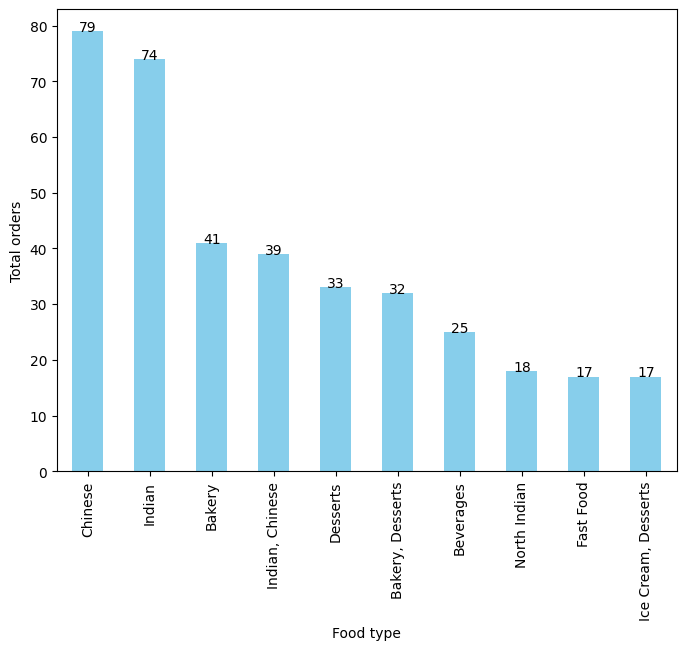

In [44]:
plt.figure(figsize=(8,6))
top_10_foods.plot(kind ='bar', color ='skyblue')
plt.xlabel("Food type")
plt.ylabel('Total orders')

for i, v in enumerate(top_10_foods):
    plt.text(i, v, str(v), ha='center')

plt.show()

In [45]:
# Top 10 locations with higest orders

top_10_locations =df['location'].value_counts().head(10)
top_10_locations

location
Borivali          309
Malad Kan East    204
Malad Kan West    191
Malad West        163
Kandivali East    143
Borivali West     127
Kandivali West     87
Dahisar            76
Jog Gor East       74
Malad East         41
Name: count, dtype: int64

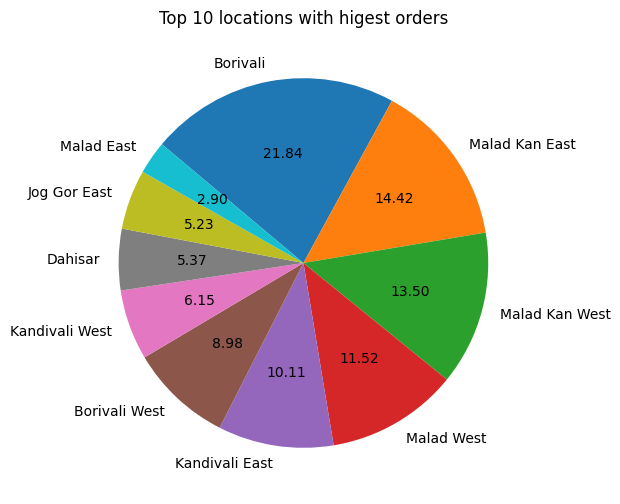

In [46]:
plt.figure(figsize=(8,6))
plt.pie(top_10_locations.values,autopct='%.2f',labels=top_10_locations.index,startangle=140, counterclock=False)
plt.title('Top 10 locations with higest orders')
plt.show()

In [47]:
# Avg rating by customers
avg_rating =df['rating'].mean()
avg_rating

np.float64(4.13321479374111)

In [48]:
#avg delivery time 
avg_delivery_time =df['delivery_time'].mean()
avg_delivery_time

np.float64(42.032875929102346)

# Machine Learning

In [49]:
# Define dependent and independent variables.

x = df.drop(['delivery_time'],axis=1)
y = df.delivery_time

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [51]:
#Create Pipeline for encoding the categorical values and to train ML model.
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('encodef', OneHotEncoder()),
    ('mod', LinearRegression())
])

In [52]:
clf.fit(x,y)

Pipeline(steps=[('encodef', OneHotEncoder()), ('mod', LinearRegression())])

In [53]:
clf.score(x,y)

0.9999999980700487

In [54]:
#Test the model on using random values.

data_to_predict = pd.DataFrame({'hotel_name': ['Charcoal Eats - Biryani & Beyond'],
                           'food_type': ['Biryani, Kebabs, Hyderabadi, North Indian'],
                           'location': ['Malad Kan East'],
                           'rating': [4.3]})

# Use the pipeline to predict delivery time
predicted_delivery_time = clf.predict(data_to_predict)

predicted_delivery_time = int(predicted_delivery_time[0])
# Print the predicted delivery time.
print("The order will deliver in",predicted_delivery_time, "mins.")


The order will deliver in 23 mins.
